In [4]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.utils import np_utils

In [5]:
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()
X_train = X_train0[:, :, :, np.newaxis].astype('float32') / 255.0
X_test = X_test0[:, :, :, np.newaxis].astype('float32') / 255.0
Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adadelta
from keras.regularizers import l2

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adadelta
from keras.regularizers import l2


model1 = Sequential()
model1.add(Conv2D(4, (5, 5), activation='relu', input_shape=(28, 28, 1), kernel_initializer="glorot_uniform"))
model1.add(MaxPooling2D())
model1.add(Flatten())
model1.add(Dense(10, activation='softmax', kernel_initializer="glorot_uniform"))

np.random.seed(0)
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adadelta())

In [14]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 4)         104       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 4)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5770      
Total params: 5,874
Trainable params: 5,874
Non-trainable params: 0
_________________________________________________________________


In [15]:
%%time
hist1 = model1.fit(X_train, Y_train, epochs=10, batch_size=600, validation_data=(X_test, Y_test), verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.8208 - acc: 0.7694 - val_loss: 0.3484 - val_acc: 0.9007
Epoch 2/10
 - 7s - loss: 0.3129 - acc: 0.9105 - val_loss: 0.2688 - val_acc: 0.9218
Epoch 3/10
 - 7s - loss: 0.2510 - acc: 0.9286 - val_loss: 0.2149 - val_acc: 0.9381
Epoch 4/10
 - 7s - loss: 0.2113 - acc: 0.9405 - val_loss: 0.1787 - val_acc: 0.9495
Epoch 5/10
 - 8s - loss: 0.1816 - acc: 0.9490 - val_loss: 0.1558 - val_acc: 0.9548
Epoch 6/10
 - 8s - loss: 0.1600 - acc: 0.9543 - val_loss: 0.1392 - val_acc: 0.9583
Epoch 7/10
 - 8s - loss: 0.1427 - acc: 0.9596 - val_loss: 0.1261 - val_acc: 0.9620
Epoch 8/10
 - 8s - loss: 0.1298 - acc: 0.9636 - val_loss: 0.1154 - val_acc: 0.9654
Epoch 9/10
 - 8s - loss: 0.1193 - acc: 0.9659 - val_loss: 0.1102 - val_acc: 0.9668
Epoch 10/10
 - 8s - loss: 0.1111 - acc: 0.9681 - val_loss: 0.1007 - val_acc: 0.9690
CPU times: user 6min 20s, sys: 25.6 s, total: 6min 46s
Wall time: 1min 14s


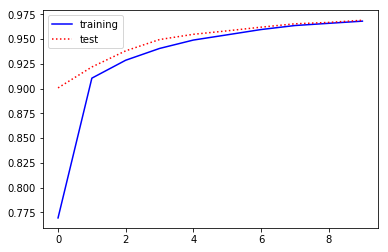

In [19]:
import matplotlib.pylab as plt
plt.plot(hist1.history['acc'], 'b-', label="training")
plt.plot(hist1.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

In [17]:
np.random.seed(0)

model2 = Sequential()

model2.add(Conv2D(4, (5, 5), activation='relu', input_shape=(28, 28, 1), kernel_initializer="glorot_uniform"))
model2.add(MaxPooling2D())
model2.add(Conv2D(4, (5, 5), activation='relu', kernel_initializer="glorot_uniform"))
model2.add(MaxPooling2D())
model2.add(Flatten())
model2.add(Dense(10, activation='softmax', kernel_initializer="glorot_uniform"))
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adadelta())

In [18]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 4)         104       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 4)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 4)           404       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 4)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 1,158
Trainable params: 1,158
Non-trainable params: 0
_________________________________________________________________


In [20]:
%%time
hist2 = model2.fit(X_train, Y_train, epochs=20, batch_size=600, validation_data=(X_test, Y_test), verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 9s - loss: 1.0248 - acc: 0.6604 - val_loss: 0.4346 - val_acc: 0.8598
Epoch 2/20
 - 8s - loss: 0.3465 - acc: 0.8943 - val_loss: 0.2700 - val_acc: 0.9197
Epoch 3/20
 - 9s - loss: 0.2665 - acc: 0.9192 - val_loss: 0.2224 - val_acc: 0.9325
Epoch 4/20
 - 10s - loss: 0.2281 - acc: 0.9312 - val_loss: 0.1974 - val_acc: 0.9400
Epoch 5/20
 - 9s - loss: 0.2018 - acc: 0.9393 - val_loss: 0.1785 - val_acc: 0.9472
Epoch 6/20
 - 10s - loss: 0.1842 - acc: 0.9449 - val_loss: 0.1575 - val_acc: 0.9537
Epoch 7/20
 - 10s - loss: 0.1694 - acc: 0.9491 - val_loss: 0.1481 - val_acc: 0.9565
Epoch 8/20
 - 9s - loss: 0.1583 - acc: 0.9528 - val_loss: 0.1384 - val_acc: 0.9592
Epoch 9/20
 - 10s - loss: 0.1480 - acc: 0.9560 - val_loss: 0.1287 - val_acc: 0.9623
Epoch 10/20
 - 10s - loss: 0.1399 - acc: 0.9582 - val_loss: 0.1253 - val_acc: 0.9627
Epoch 11/20
 - 9s - loss: 0.1338 - acc: 0.9602 - val_loss: 0.1158 - val_acc: 0.9653
Epoch 12/20
 - 9s - loss: 0.12

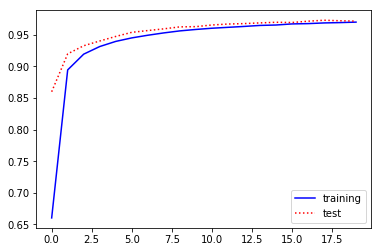

In [21]:
plt.plot(hist2.history['acc'], 'b-', label="training")
plt.plot(hist2.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()